In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import plotly.express as px 

In [6]:
df = pd.read_csv('../../datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns = ['Id','Gender','Age','Income','Spending_Score']
df.head()

,Id,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
x = df[['Income','Spending_Score']]
x

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## Dendrogram to find Clusters

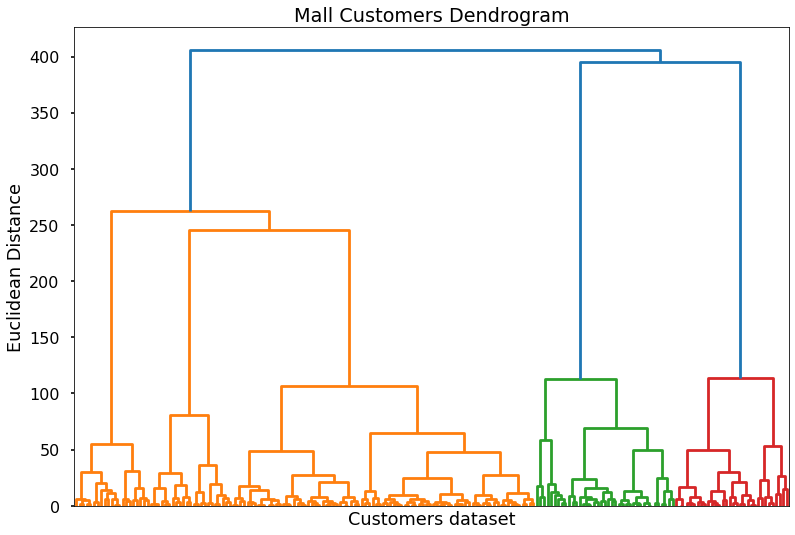

In [20]:
plt.style.use('seaborn-poster')
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Mall Customers Dendrogram')
plt.xlabel('Customers dataset')
plt.ylabel('Euclidean Distance')
plt.xticks([])
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
df['groups'] = model.fit_predict(x)
df

,Id,Gender,Age,Income,Spending_Score,groups
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [19]:
fig = px.scatter(df,x='Income',y='Spending_Score',color='groups')
fig.show()